<a href="https://colab.research.google.com/github/gmurari30/gmurari30/blob/main/Instacart_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'


Read the data files

In [2]:
from google.colab import files
uploaded = files.upload()

aisles_df = pd.read_csv('Aisles_Data.csv')
departments_df = pd.read_csv('departments_data.csv')
order_products_prior_df = pd.read_csv('order_products_prior_data.csv')
order_products_train_df = pd.read_csv('order_products_train_data.csv')
orders_df = pd.read_csv('orders.csv')
products_df = pd.read_csv('products_data.csv')

Saving Aisles_Data.csv to Aisles_Data.csv
Saving departments_data.csv to departments_data.csv
Saving order_products_prior_data.csv to order_products_prior_data.csv
Saving order_products_train_data.csv to order_products_train_data.csv
Saving orders.csv to orders.csv
Saving products_data.csv to products_data.csv


orders.csv has all the information about the given order id like the user who has purchased the order, when was it purchased, days since prior order and so on.

The columns present in order_products_train and order_products_prior are same. In this dataset, 4 to 100 orders of a customer are given (we will look at this later) and we need to predict the products that will be re-ordered. So the last order of the user has been taken out and divided into train and test sets. All the prior order informations of the customer are present in order_products_prior file. We can also note that there is a column in orders.csv file called eval_set which tells us as to which of the three datasets (prior, train or test) the given row goes to.

Order_products*csv file has more detailed information about the products that been bought in the given order along with the re-ordered status.

In [3]:
print(aisles_df.head())
print(departments_df.head()) 
print(products_df.head())
print(order_products_prior_df.head())
print(order_products_train_df.head())
print(orders_df.head())


   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
   product_id  ... department_id
0           1  ...            19
1           2  ...            13
2           3  ...             7
3           4  ...             1
4           5  ...            13

[5 rows x 4 columns]
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
   order_id  product_id  add_to_cart_order  reor

value count of the 3 eval sets in the orders.csv(train, prior, test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


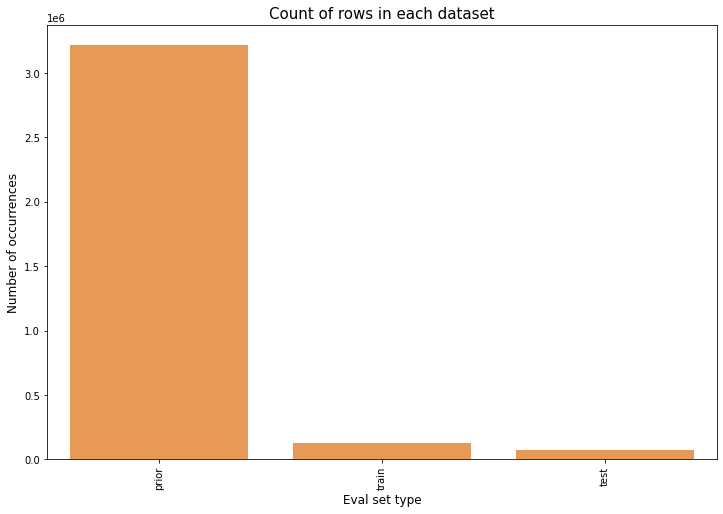

In [4]:
count = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values, alpha=0.8, color=color[1])
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Unique counts: Total customers = 206,209 customers who ordered previously from Instacart. Out of which, the last purchase of 131,209 customers were given as train set and we need to predict for the rest 75,000 customers.

In [5]:
def get_unique_count(x):
    return len(np.unique(x))

count = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
count

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

validating the claim that 4 to 100 orders of a customer are given.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


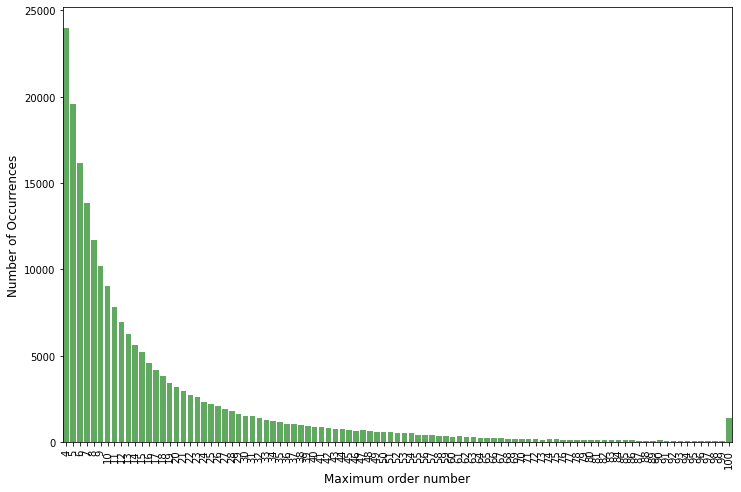

In [6]:
count = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
count = count.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

ordering habit changes with the dow (days of week) - 0 and 1 looks like Saturday and Sunday as the orders are high and 4 = Wednesday when the orders are low.

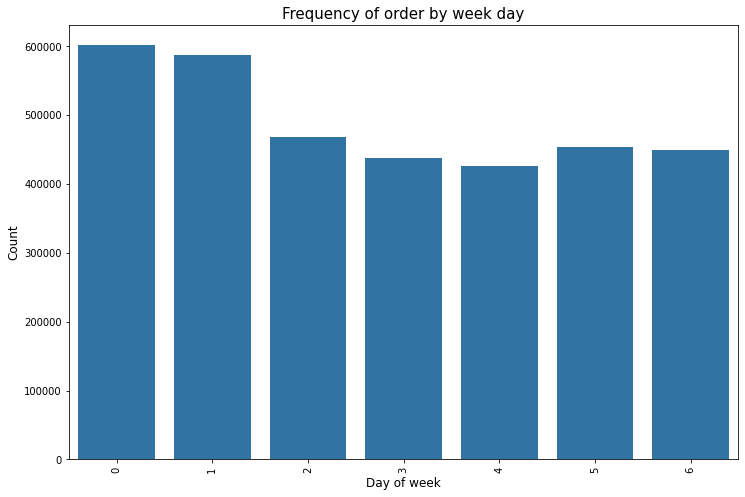

In [7]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0]) #days of week
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

distribution with respect to time of the day(hour of day) - So majority of the orders are made during day time. 

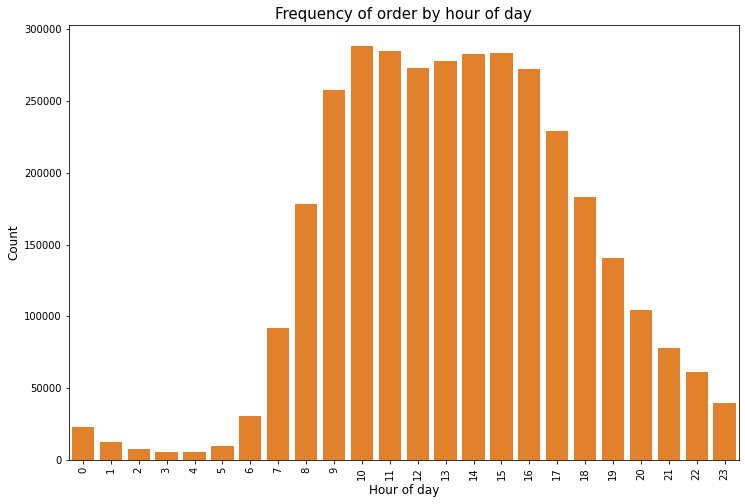

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

Combining the day of week(dow) and hour of day(hod) to see the distribution. Satuday evenings and Sunday mornings are the prime time for orders.

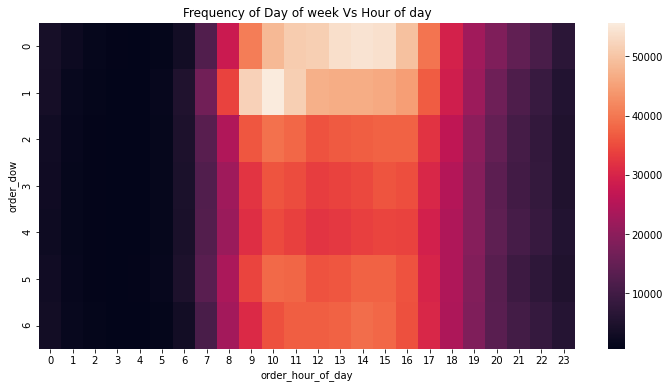

In [9]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

check the time interval between the orders. Highes peaks- 7th and 30th days. Hence, customers order once in every week or once in a month.

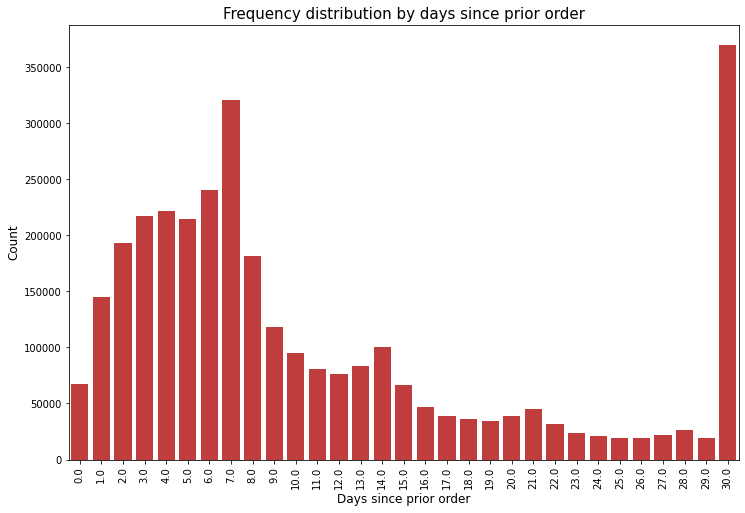

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()


check the re-order percentage in prior set and train set. Prior set has 59% reorders and train set has 59.9% reorders. On an average, about 59% of the products in an order are re-ordered products.

In [11]:
print(order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0])
print(order_products_train_df.reordered.sum() / order_products_train_df.shape[0])

0.5904594330400782
0.5985342011777889


Count the number of No re-ordered products. About 12% of the orders in prior set has no re-ordered items while in the train set it is 6.5%.

In [15]:
#prior dataset
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
print(grouped_df.reordered.value_counts() / grouped_df.shape[0])

#train dataset
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
print(grouped_df.reordered.value_counts() / grouped_df.shape[0])

1    0.879472
0    0.120528
Name: reordered, dtype: float64
1    0.934842
0    0.065158
Name: reordered, dtype: float64


Check the  number of products bought in each order. 5th order has maximum products

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


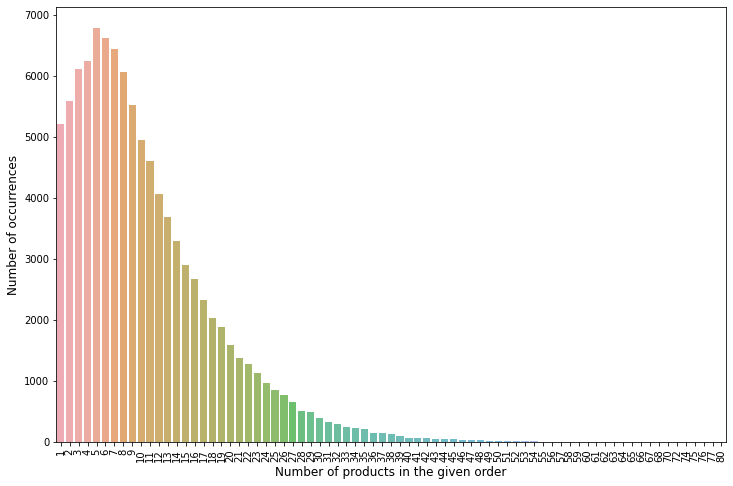

In [16]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

merge these product, aisles, departments details with the order_prior details.

In [19]:
products_df.head()
aisles_df.head()
departments_df.head()

#merge order_prior with products
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')

#merge order_products_prior with aisles and departments
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


Check the count of each product in the order_products_prior dataset

In [20]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,15450
1,Bag of Organic Bananas,12409
2,Organic Strawberries,8528
3,Organic Baby Spinach,7852
4,Organic Hass Avocado,6857
5,Organic Avocado,5646
6,Large Lemon,4928
7,Strawberries,4587
8,Limes,4526
9,Organic Raspberries,4420


Check the important aisles- Max xount in fresh fruits and veg aisles.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


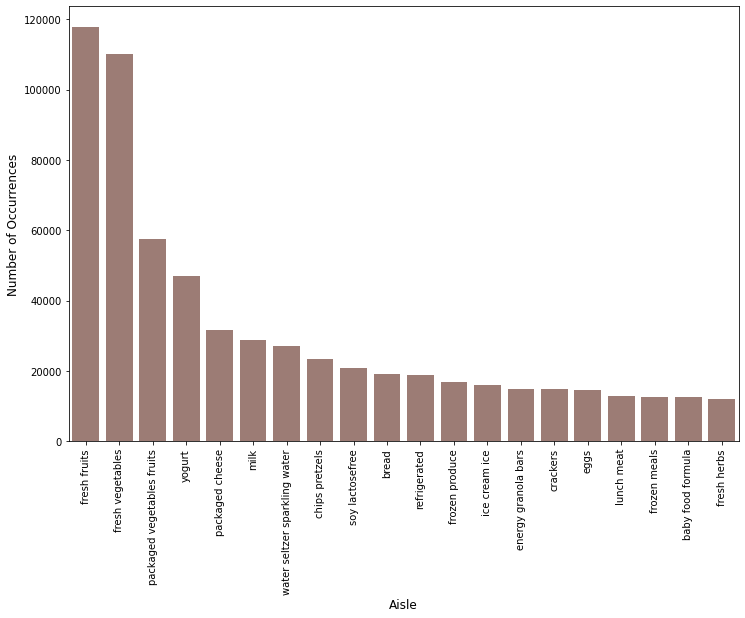

In [21]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


Most important department- Produce is the largest department

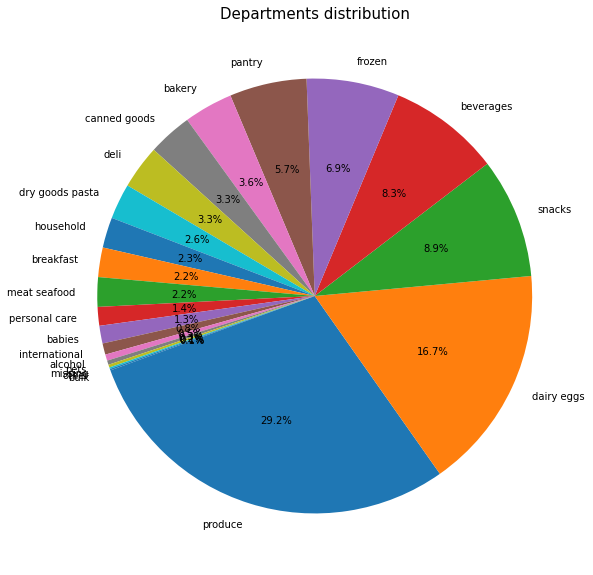

In [22]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

Department wise reorder count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


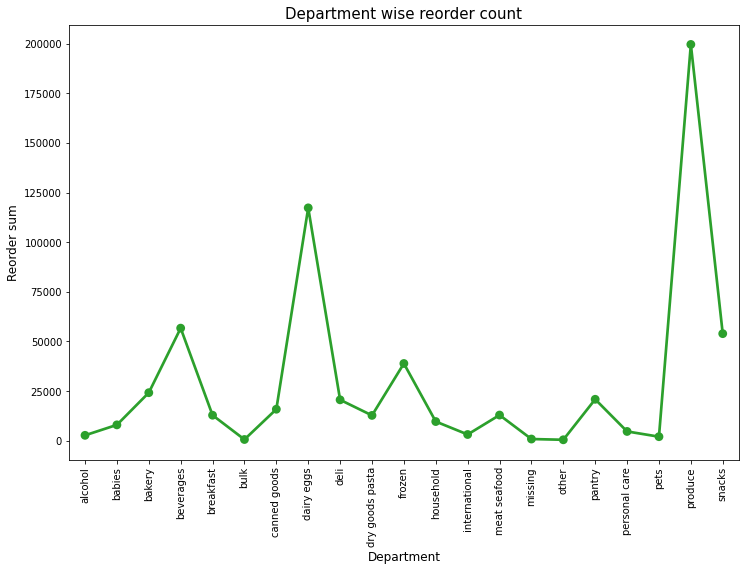

In [29]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("sum").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder sum', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder count", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


Aisle wise reorder count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


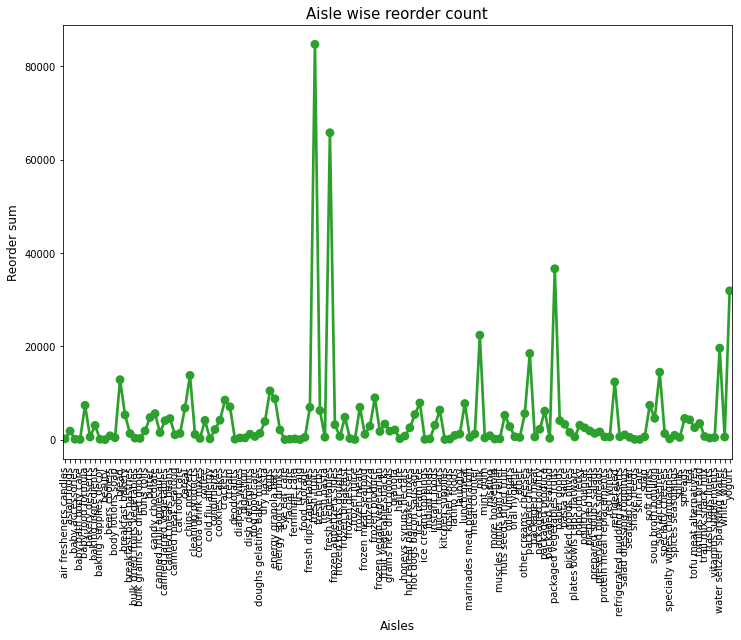

In [28]:
grouped_df = order_products_prior_df.groupby(["aisle"])["reordered"].aggregate("sum").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['aisle'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder sum', fontsize=12)
plt.xlabel('Aisles', fontsize=12)
plt.title("Aisle wise reorder count", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Aisle reorder ratio

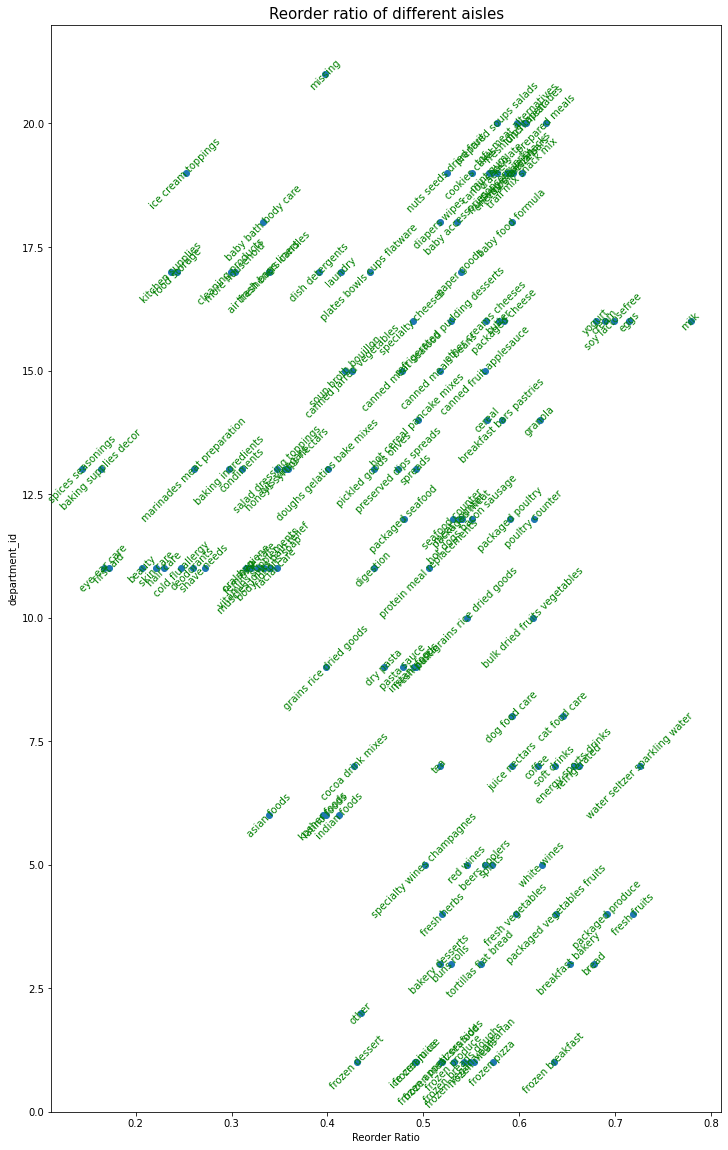

In [30]:
grouped_df = order_products_prior_df.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()

Add to Cart - Reorder ratio:
Relationship between order of adding the product to the cart and the reorder ratio. The products that are added to the cart initially are more likely to be reordered again compared to the ones added later.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


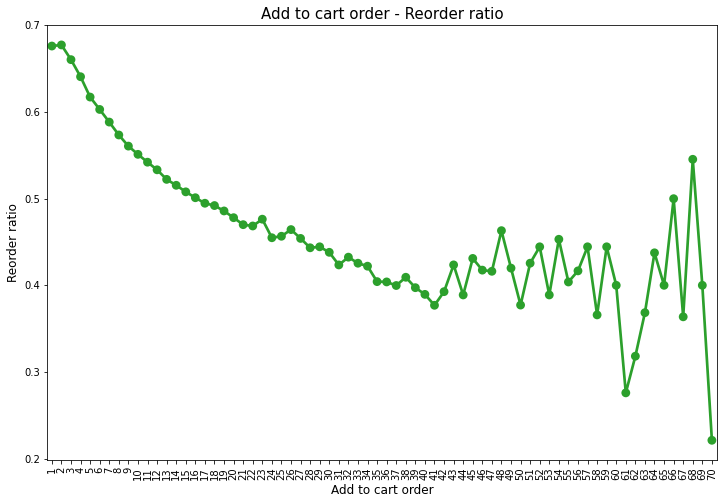

In [32]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].loc[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Reorder ration by day of the week: Saturday and Thursday have higher reorder ratio

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


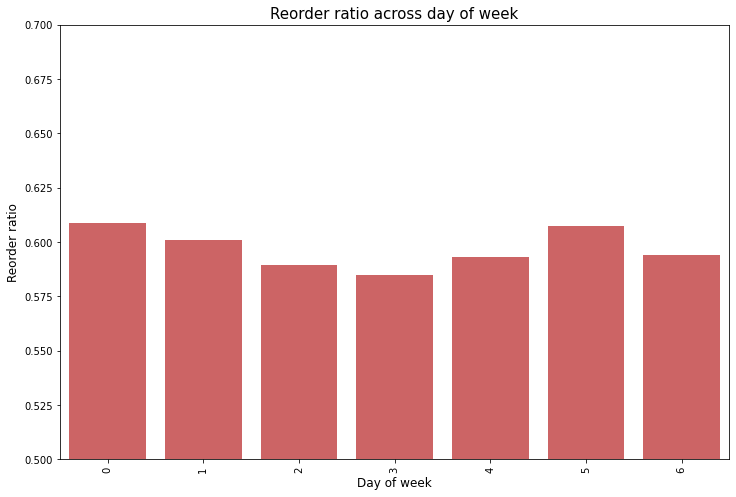

In [33]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

Reorder ration by hour of the day: Mornings have higher reorder ratio

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


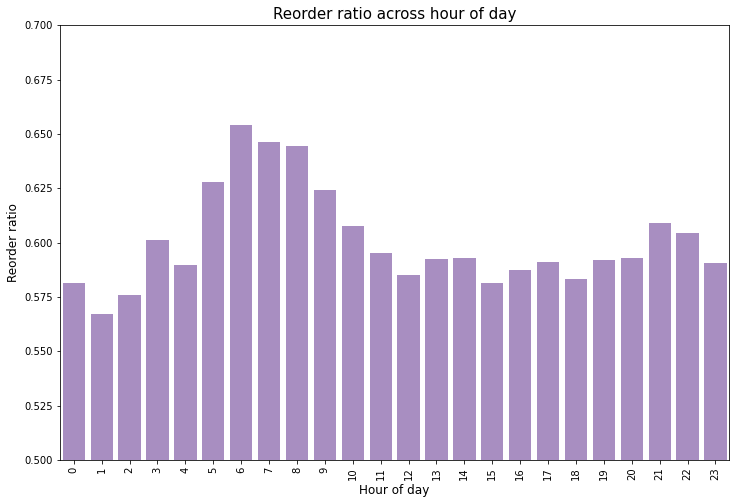

In [34]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

Reorder ration by day of the week and hour of the day: Saturday and Thursday mornings have higher reorder ratio

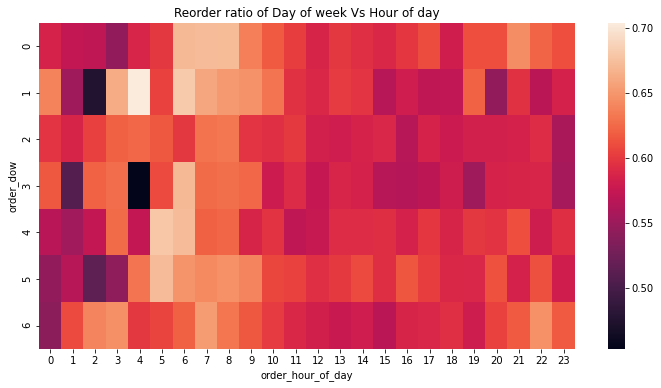

In [35]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

Prior and train order datasets: Write to csv files

In [43]:
order_products_prior_df.to_csv('Prior_orders.csv')
order_products_train_df.to_csv('Train_orders.csv')


In [44]:
files.download('Prior_orders.csv')
files.download('Train_orders.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Merging prior and train order datasets

In [47]:
#merge order_products_prior and order_products_train datasets
order_products_prior_train_df = pd.merge(order_products_prior_df, order_products_train_df, on='order_id', how='left')
order_products_prior_train_df.head()

,order_id,product_id_x,add_to_cart_order_x,reordered_x,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod,product_id_y,add_to_cart_order_y,reordered_y,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Combined Prior and train order datasets: Write to csv files

In [48]:
order_products_prior_train_df.to_csv('Prior_train_orders.csv')
files.download('Prior_train_orders.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>